In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px #graphing
import missingno as msno #describe data
import os
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Import Data

In [3]:
draft = pd.read_csv("./nba-draft-basketball-player-data/nbaplayersdraft.csv")
player = pd.read_csv("./nba-players-data/all_seasons.csv")
ft= pd.read_csv("./nba-players-data/all_seasons.csv")

In [4]:
draft.describe()

,id,year,rank,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
count,1922.000000,1922.000000,1922.000000,1922.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,...,1545.000000,1633.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1668.000000,1668.000000,1669.000000
mean,961.500000,2005.317378,29.694589,29.694589,6.332534,348.042540,8399.055722,3580.413421,1497.009587,774.300779,...,0.272405,0.716825,18.134032,7.275734,3.194368,1.550749,17.873697,0.061691,-2.311271,4.403176
std,554.977927,9.456946,16.912454,16.912454,4.656321,324.897567,9845.871529,4826.142847,2003.686388,1284.602969,...,0.128339,0.118702,8.707656,4.969343,2.083895,1.488536,27.989805,0.094467,4.143403,11.461729
min,1.000000,1989.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.264000,-52.000000,-8.500000
25%,481.250000,1997.000000,15.000000,15.000000,2.000000,72.000000,838.000000,265.000000,128.000000,46.000000,...,0.222000,0.659000,11.000000,3.400000,1.700000,0.500000,0.400000,0.030000,-3.900000,-0.400000
50%,961.500000,2005.000000,30.000000,30.000000,5.000000,235.000000,4204.000000,1552.000000,656.000000,257.000000,...,0.317000,0.736000,17.700000,6.200000,2.800000,1.100000,5.300000,0.069000,-2.000000,0.000000
75%,1441.750000,2013.000000,44.000000,44.000000,10.000000,584.000000,13246.000000,5150.000000,2139.000000,910.000000,...,0.356000,0.797000,24.800000,10.000000,4.200000,2.100000,24.500000,0.104000,-0.300000,4.500000
max,1922.000000,2021.000000,60.000000,60.000000,22.000000,1541.000000,52139.000000,37062.000000,15091.000000,12091.000000,...,1.000000,1.000000,41.100000,27.200000,13.300000,9.500000,249.500000,1.442000,51.100000,142.600000


# Classificando as faculdades pelo total de minutos do jogador na NBA

In [5]:
df1=draft.groupby(["college"]).sum().sort_values(by=["minutes_played"],ascending=False)
df2=df1[["games","minutes_played","points","total_rebounds","assists"]]
df2=df2.reset_index()

In [6]:
df2=df2.reset_index()
df3=df2[["index","college","minutes_played"]]
df3.columns=["college_rank","college","minutes_played"]
df4=df3.merge(draft,left_on="college",right_on="college",suffixes=('_left', '_right'))

In [7]:
df3.head(30)

,college_rank,college,minutes_played
0,0,Kentucky,538292.0
1,1,Duke,535270.0
2,2,UNC,504352.0
3,3,Arizona,419753.0
4,4,UCLA,397511.0
5,5,UConn,366593.0
6,6,Kansas,339051.0
7,7,Michigan,299274.0
8,8,Georgia Tech,280831.0
9,9,Texas,244750.0


# NBA Draft Analysis (por faculdade)

In [8]:
df0 = df4[df4["games"] > 0]

sorted_df = df0.sort_values(by = "college_rank", ascending = True)

fig = px.scatter(sorted_df, x = "overall_pick", y = "points_per_game",
                    range_x = (0, 60), range_y = (0, 30),
                    hover_data = ["college"],
                    hover_name="player",
                    animation_frame = "college_rank", range_color = (0, 25),
                    color = "points_per_game", color_continuous_scale = "Blues")
                    #title = "Points Per Game Overall Pick 1-60 Animation by Year and Games")

fig.update_traces(marker = dict(size = 5)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

# Análise de estatísticas cumulativas dos jogadores da NBA (por faculdade)

## Total de minutos da NBA, total de jogos da NBA, total de anos ativos da NBA, total de pontos da NBA por Top 50 College (classificação por total de minutos do jogador)

In [9]:
fig = px.scatter_3d(df2, x = "points", y = "total_rebounds", z = "assists", opacity = 0.75,
                    color = "games", color_continuous_scale = "Blues",
                    title = "Total de pontos da NBA, assistências, rebote por faculdade",
                    hover_name="college")
fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

In [10]:
df8=draft[draft["games"]>82]
df9=df8.groupby(["college"]).count()
df10=df9[df9["id"]>=5]
df10["more_than_5_NBA_player"]=1
df10=df10.reset_index()
df11=df10[["college","more_than_5_NBA_player"]]
df12=df11.merge(df8,left_on="college",right_on="college",suffixes=('_left', '_right'))
df13=df12[df12["more_than_5_NBA_player"]==1]
df14=df13.groupby("college").mean().reset_index()

C:\Users\paulo\AppData\Local\Temp\ipykernel_15072\2013666365.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Repartição do total de minutos jogados do jogador da NBA, total de jogos disputados, total de anos ativos (por faculdade)

In [11]:
for y in ["minutes_played_right", "games", "years_active"]:
    
    fig = px.bar(df4[df4["college_rank"]<50], x = "college_rank", y = y, title = f"Jogadores do ranking universitário 1-50: {y}",
    color = "college_rank", color_continuous_scale = "Blues_r",
                hover_data=['player'],
                hover_name="college")

    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 15))
    fig.show()
    print("")

## Top 100 scorers, assistentes, rebotes da faculdade

In [12]:
sorted_df = df4.sort_values(by = "points", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "player", y = "points", 
             title = "Top 100 NBA Scorers",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
iplot(fig)

*Melhores assistentes*

In [13]:
sorted_df = df4.sort_values(by = "assists", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "player", y = "assists", 
             title = "Os 100 melhores assistentes da NBA",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
iplot(fig)

*Best Rebounders*


In [14]:
sorted_df = df4.sort_values(by = "total_rebounds", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "player", y = "total_rebounds", 
             title = "Os 100 melhores reboteiros da NBA",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
iplot(fig)

# Análise de estatísticas médias dos jogadores da NBA (por faculdade)

In [15]:
fig = px.scatter_3d(df14, x = "points_per_game", y = "average_total_rebounds", z = "average_assists", opacity = 0.75,
                    color = "points_per_game", color_continuous_scale = "Blues",
                    title = "NBA Average Points Assists Rebound By College (Only include college that have more than 5 NBA players)",
                    hover_name="college")

fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

## Porcentagem média de 3 ponteiros dos jogadores na análise da NBA (por faculdade)

In [16]:
df5=draft[draft["games"]>82].groupby(["college"]).mean().sort_values(by=["minutes_played"],ascending=False)
df6=df5[["3_point_percentage","free_throw_percentage"]].reset_index()
df7=df3.merge(df6,left_on="college",right_on="college",suffixes=('_left', '_right'))

In [17]:
sorted_df = df7[df7["college_rank"]<30].sort_values(by = "3_point_percentage", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "college", y = "3_point_percentage", 
             title = "As 30 melhores faculdades com média de 3 pontos percentuais (NBA)",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
fig.show()

Pelo resultado que obtive no gráfico acima, há uma descoberta interessante: no Top 30 universitários, jogadores do Texas e Villanova têm a melhor aparência de arremessos de 3 pontos e jogadores de Georgetown e Stanford têm a pior aparência de arremessos de 3 pontos.

Vamos descobrir quais jogadores representativos podemos obter dessas faculdades

## Texas (3PT 32.95%)

In [18]:
df8[df8["college"]=="Texas"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1023,1024,2007,2,2,SEA,Kevin Durant,Texas,14.0,939.0,34509.0,...,0.384,0.884,36.8,27.2,7.1,4.3,155.2,0.216,6.8,76.4
963,964,2006,2,2,CHI,LaMarcus Aldridge,Texas,16.0,1076.0,36242.0,...,0.320,0.813,33.7,19.1,8.1,1.9,115.7,0.153,1.7,33.4
1090,1091,2008,9,9,CHA,D.J. Augustin,Texas,14.0,976.0,22851.0,...,0.381,0.867,23.4,9.5,1.8,3.9,47.7,0.100,-0.7,7.6
1220,1221,2010,19,19,BOS,Avery Bradley,Texas,12.0,660.0,18151.0,...,0.365,0.783,27.5,11.0,2.8,1.7,17.2,0.045,-2.4,-1.8
1265,1266,2011,4,4,CLE,Tristan Thompson,Texas,11.0,730.0,19556.0,...,0.263,0.605,26.8,9.0,8.4,1.0,47.6,0.117,-1.7,1.4
996,997,2006,35,35,TOR,P.J. Tucker,Texas,11.0,777.0,22529.0,...,0.364,0.748,29.0,7.1,5.6,1.5,40.0,0.085,-0.7,7.2
1512,1513,2015,11,11,IND,Myles Turner,Texas,7.0,431.0,12379.0,...,0.349,0.768,28.7,12.7,6.7,1.2,32.8,0.127,0.6,8.2
1290,1291,2011,29,29,SAS,Cory Joseph,Texas,11.0,728.0,16161.0,...,0.344,0.787,22.2,7.1,2.6,3.0,28.7,0.085,-1.1,3.9
792,793,2003,8,8,MIL,T.J. Ford,Texas,8.0,429.0,11882.0,...,0.289,0.815,27.7,11.2,3.1,5.8,16.9,0.068,-0.4,4.6
1643,1644,2017,22,22,BRK,Jarrett Allen,Texas,5.0,341.0,9062.0,...,0.189,0.699,26.6,11.6,8.7,1.4,34.9,0.185,1.7,8.5


In [19]:
df8[df8["college"]=="Texas"].mean()

C:\Users\paulo\AppData\Local\Temp\ipykernel_15072\1575137453.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id                            1065.666667
year                          2007.333333
rank                            17.055556
overall_pick                    17.055556
years_active                     8.444444
games                          513.333333
minutes_played               13405.666667
points                        5996.111111
total_rebounds                2513.555556
assists                       1161.833333
field_goal_percentage            0.466722
3_point_percentage               0.329500
free_throw_percentage            0.747389
average_minutes_played          23.438889
points_per_game                  9.938889
average_total_rebounds           4.405556
average_assists                  1.955556
win_shares                      33.305556
win_shares_per_48_minutes        0.100167
box_plus_minus                  -0.577778
value_over_replacement           8.288889
dtype: float64

Há 18 jogadores da NBA do Texas jogando mais de 82 jogos em sua carreira na NBA com 9,93 pontos por jogo, 4,40 rebotes por jogo, 1,95 assistências por jogo

Porcentagem média de arremessos de 3 pontos: 32,95

Os jogadores representativos são: Kevin Durant(SF), LaMarcus Aldridge(PF), D.J. Augustin (PG), Avery Bradley (PG), Tristan Thompson (PF)

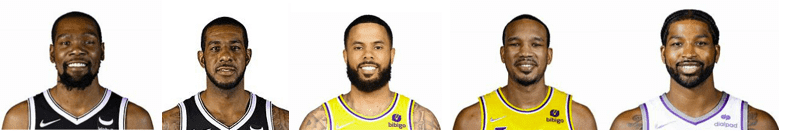

## Villanova (3PT 32.94%)

In [20]:
#Villanova
df8[df8["college"]=="Villanova"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
985,986,2006,24,24,MEM,Kyle Lowry,Villanova,16.0,1023.0,32613.0,...,0.368,0.813,31.9,14.8,4.4,6.3,104.6,0.154,3.1,41.8
446,447,1997,7,7,NJN,Tim Thomas,Villanova,13.0,824.0,21336.0,...,0.369,0.758,25.9,11.5,4.1,1.5,35.2,0.079,-0.8,6.4
968,969,2006,7,7,BOS,Randy Foye,Villanova,11.0,752.0,19279.0,...,0.366,0.852,25.6,10.3,2.2,2.8,23.5,0.058,-1.2,3.8
389,390,1996,8,8,NJN,Kerry Kittles,Villanova,8.0,507.0,16929.0,...,0.378,0.780,33.4,14.1,3.9,2.6,44.8,0.127,2.2,18.0
37,38,1989,38,38,MIN,Doug West,Villanova,12.0,676.0,16649.0,...,0.191,0.801,24.6,9.6,2.5,1.9,17.7,0.051,-3.0,-4.2
486,487,1997,47,47,POR,Alvin Williams,Villanova,9.0,460.0,12610.0,...,0.313,0.760,27.4,9.0,2.5,4.1,21.7,0.082,-0.4,4.9
1174,1175,2009,33,33,POR,Dante Cunningham,Villanova,10.0,715.0,14875.0,...,0.345,0.649,20.8,5.8,3.7,0.7,24.9,0.080,-1.7,1.1
1691,1692,2018,10,10,PHI,Mikal Bridges,Villanova,4.0,309.0,9661.0,...,0.374,0.831,31.3,11.3,3.9,2.1,24.6,0.122,1.1,7.5
1714,1715,2018,33,33,DAL,Jalen Brunson,Villanova,4.0,277.0,6834.0,...,0.373,0.800,24.7,11.9,3.0,3.7,17.3,0.121,0.0,3.5
1651,1652,2017,30,30,UTA,Josh Hart,Villanova,5.0,296.0,8071.0,...,0.347,0.739,27.3,9.9,5.7,2.1,15.7,0.094,-0.3,3.4


In [21]:
df8[df8["college"]=="Villanova"].mean()

C:\Users\paulo\AppData\Local\Temp\ipykernel_15072\3683390187.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id                            1174.625000
year                          2009.000000
rank                            24.937500
overall_pick                    24.937500
years_active                     6.937500
games                          419.312500
minutes_played               10992.000000
points                        4430.062500
total_rebounds                1503.437500
assists                       1151.000000
field_goal_percentage            0.444062
3_point_percentage               0.329437
free_throw_percentage            0.760250
average_minutes_played          24.075000
points_per_game                  9.631250
average_total_rebounds           3.581250
average_assists                  2.262500
win_shares                      22.262500
win_shares_per_48_minutes        0.084062
box_plus_minus                  -0.875000
value_over_replacement           5.550000
dtype: float64

Há 16 jogadores da NBA de Villanova jogando mais de 82 jogos em sua carreira na NBA com 9,63 pontos por jogo, 3,58 rebotes por jogo, 2,26 assistências por jogo

Porcentagem média de arremessos de 3 pontos: 32,94

Os jogadores representativos são: Kyle Lowry(PG), Tim Thomas(PF), Randy Foye(SG/SF), Kerry Kittles(SG), Doug West(SG/SF)

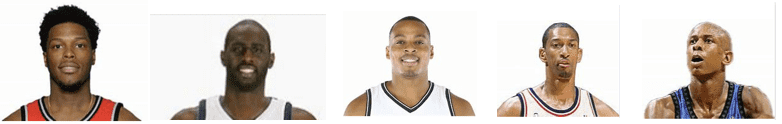

## Georgetown (3PT 15.47%)

In [22]:
#Georgetown
df8[df8["college"]=="Georgetown"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
382,383,1996,1,1,PHI,Allen Iverson,Georgetown,14.0,914.0,37584.0,...,0.313,0.780,41.1,26.7,3.7,6.2,99.0,0.126,3.2,49.6
163,164,1992,2,2,CHH,Alonzo Mourning,Georgetown,15.0,838.0,25975.0,...,0.247,0.692,31.0,17.1,8.5,1.1,89.7,0.166,2.2,27.4
1026,1027,2007,5,5,BOS,Jeff Green,Georgetown,14.0,1051.0,30463.0,...,0.339,0.806,29.0,12.6,4.3,1.5,50.3,0.079,-1.4,4.8
111,112,1991,4,4,DEN,Dikembe Mutombo,Georgetown,18.0,1196.0,36791.0,...,0.000,0.684,30.8,9.8,10.3,1.0,117.0,0.153,1.7,33.9
1208,1209,2010,7,7,DET,Greg Monroe,Georgetown,10.0,646.0,17670.0,...,0.059,0.703,27.4,13.0,8.2,2.1,50.4,0.137,1.4,15.3
1098,1099,2008,17,17,TOR,Roy Hibbert,Georgetown,9.0,662.0,16389.0,...,0.250,0.755,24.8,10.0,6.3,1.3,35.9,0.105,-1.1,3.5
1384,1385,2013,3,3,WAS,Otto Porter Jr.,Georgetown,9.0,504.0,13080.0,...,0.398,0.794,26.0,10.6,5.1,1.5,36.0,0.132,1.8,12.5
411,412,1996,30,30,HOU,Othella Harrington,Georgetown,12.0,709.0,13924.0,...,0.000,0.738,19.6,7.4,4.4,0.6,23.1,0.080,-3.4,-4.9
407,408,1996,26,26,DET,Jerome Williams,Georgetown,9.0,587.0,12755.0,...,0.038,0.645,21.7,6.6,6.4,0.8,37.9,0.143,0.3,7.4
539,540,1998,43,43,WAS,Jahidi White,Georgetown,7.0,334.0,5913.0,...,0.000,0.534,17.7,5.9,5.8,0.2,10.4,0.085,-3.2,-1.8


In [23]:
df8[df8["college"]=="Georgetown"].mean()

C:\Users\paulo\AppData\Local\Temp\ipykernel_15072\4121288749.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id                             699.384615
year                          2001.076923
rank                            18.461538
overall_pick                    18.461538
years_active                    10.230769
games                          627.692308
minutes_played               16949.846154
points                        7563.923077
total_rebounds                3886.307692
assists                       1058.461538
field_goal_percentage            0.483846
3_point_percentage               0.154692
free_throw_percentage            0.701538
average_minutes_played          23.676923
points_per_game                 10.238462
average_total_rebounds           5.492308
average_assists                  1.353846
win_shares                      43.930769
win_shares_per_48_minutes        0.109538
box_plus_minus                  -0.700000
value_over_replacement          11.238462
dtype: float64

Existem 13 jogadores da NBA de Georgetown jogando mais de 82 jogos em sua carreira na NBA com 10,23 pontos por jogo, 5,49 rebotes por jogo, 1,35 assistências por jogo

Porcentagem média de arremessos de 3 pontos: 15,47

Os jogadores representativos são: Allen Iverson(PG/SG), Alonzo Mourning(C), Jeff Green(SF/PF), Dikembe Mutombo(C), Greg Monroe(C)

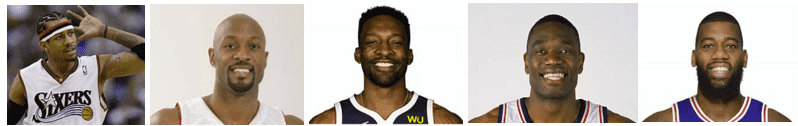

## Stanford (3PT 20.47%)

In [24]:
#Stanford
df8[df8["college"]=="Stanford"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1091,1092,2008,10,10,NJN,Brook Lopez,Stanford,14.0,868.0,26192.0,...,0.341,0.796,30.2,16.4,6.2,1.4,71.5,0.131,1.3,21.7
1096,1097,2008,15,15,PHO,Robin Lopez,Stanford,14.0,939.0,20573.0,...,0.294,0.742,21.9,8.7,4.9,0.8,49.0,0.114,-1.1,4.7
455,456,1997,16,16,CLE,Brevin Knight,Stanford,12.0,729.0,18176.0,...,0.134,0.789,24.9,7.3,2.4,6.1,32.6,0.086,0.3,10.5
1486,1487,2014,45,45,CHH,Dwight Powell,Stanford,8.0,511.0,9720.0,...,0.296,0.751,19.0,7.7,4.6,1.0,38.0,0.188,1.3,8.0
848,849,2004,6,6,ATL,Josh Childress,Stanford,8.0,391.0,10432.0,...,0.329,0.779,26.7,9.1,4.7,1.6,25.7,0.118,0.8,7.4
171,172,1992,10,10,ATL,Adam Keefe,Stanford,9.0,617.0,10334.0,...,0.071,0.714,16.7,5.0,4.1,0.7,24.9,0.116,-1.3,1.7
688,689,2001,18,18,HOU,Jason Collins,Stanford,13.0,735.0,14974.0,...,0.206,0.647,20.4,3.6,3.7,0.9,20.1,0.064,-3.7,-6.5
722,723,2001,53,53,UTA,Jarron Collins,Stanford,10.0,542.0,8542.0,...,0.000,0.699,15.8,3.9,2.9,0.8,15.7,0.088,-3.1,-2.5
14,15,1989,15,15,DEN,Todd Lichti,Stanford,5.0,237.0,4240.0,...,0.244,0.789,17.9,7.9,2.1,1.4,5.6,0.063,-2.5,-0.5
1240,1241,2010,39,39,NYK,Landry Fields,Stanford,5.0,255.0,6010.0,...,0.332,0.666,23.6,6.8,4.3,1.6,10.5,0.084,-0.3,2.6


In [25]:
df8[df8["college"]=="Stanford"].mean()

C:\Users\paulo\AppData\Local\Temp\ipykernel_15072\64236473.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id                             766.076923
year                          2002.153846
rank                            22.769231
overall_pick                    22.769231
years_active                     8.692308
games                          511.307692
minutes_played               10843.461538
points                        3800.307692
total_rebounds                2029.538462
assists                        801.615385
field_goal_percentage            0.470846
3_point_percentage               0.204769
free_throw_percentage            0.723846
average_minutes_played          20.069231
points_per_game                  6.684615
average_total_rebounds           3.661538
average_assists                  1.430769
win_shares                      23.769231
win_shares_per_48_minutes        0.094077
box_plus_minus                  -1.415385
value_over_replacement           3.338462
dtype: float64

Existem 13 jogadores da NBA de Stanford jogando mais de 82 jogos em sua carreira na NBA com 6,68 pontos por jogo, 3,66 rebotes por jogo, 1,43 assistências por jogo

Porcentagem média de arremessos de 3 pontos: 20,47

Os jogadores representativos são: Brook Lopez(C), Robin Lopez(C), Dwight Powell(PF/C), Josh Childress(SF), Brevin Knight(PG)

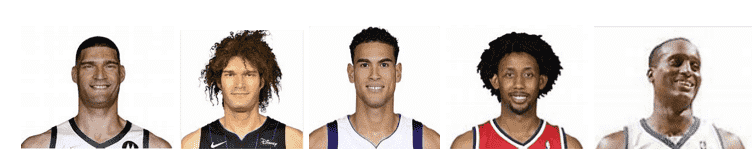

## Porcentagem de lances livres dos jogadores na análise da NBA (por faculdade)

In [26]:
sorted_df = df7[df7["college_rank"]<30].sort_values(by = "free_throw_percentage", ascending = False)

sorted_df = sorted_df.head(100)

fig = px.bar(sorted_df, x = "college", y = "free_throw_percentage", 
             title = "Melhor porcentagem de lances livres (NBA) por faculdade",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
fig.show()

Entre as 30 melhores faculdades, a USC tem a melhor porcentagem de lances livres, enquanto Cincinnati tem a pior porcentagem de lances livres

Vamos descobrir quais jogadores representativos podemos obter dessas faculdades

## USC (FT 76.33%)

In [27]:
#USC
df8[df8["college"]=="USC"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1150,1151,2009,9,9,TOR,DeMar DeRozan,USC,13.0,957.0,32789.0,...,0.288,0.837,34.3,20.8,4.4,3.9,83.7,0.123,0.7,22.6
1277,1278,2011,16,16,PHI,Nikola Vučević,USC,11.0,741.0,22869.0,...,0.348,0.757,30.9,16.9,10.4,2.7,58.9,0.124,2.2,24.3
1037,1038,2007,16,16,WAS,Nick Young,USC,12.0,720.0,16419.0,...,0.376,0.836,22.8,11.4,2.0,1.0,18.6,0.054,-2.2,-0.8
1167,1168,2009,26,26,CHI,Taj Gibson,USC,13.0,896.0,21976.0,...,0.257,0.713,24.5,9.0,6.1,1.0,58.9,0.129,-0.7,7.1
1084,1085,2008,3,3,MIN,O.J. Mayo,USC,8.0,547.0,16919.0,...,0.373,0.820,30.9,13.8,3.1,2.9,21.8,0.062,-0.9,4.7
1727,1728,2018,46,46,HOU,De'Anthony Melton,USC,4.0,235.0,4853.0,...,0.361,0.766,20.7,8.4,3.6,2.8,7.7,0.076,0.5,3.1
1771,1772,2019,30,30,MIL,Kevin Porter Jr.,USC,3.0,137.0,3904.0,...,0.352,0.686,28.5,13.7,3.9,4.7,1.1,0.014,-2.7,-0.7
173,174,1992,12,12,MIA,Harold Miner,USC,4.0,200.0,3748.0,...,0.311,0.785,18.7,9.0,2.2,1.2,4.2,0.053,-3.0,-0.9
704,705,2001,35,35,NJN,Brian Scalabrine,USC,11.0,520.0,6772.0,...,0.344,0.783,13.0,3.1,2.0,0.8,7.6,0.054,-2.7,-1.2
1730,1731,2018,49,49,SAS,Chimezie Metu,USC,4.0,143.0,2017.0,...,0.308,0.762,14.1,6.1,3.6,0.8,2.1,0.050,-2.3,-0.2


In [28]:
df8[df8["college"]=="USC"].mean()

C:\Users\paulo\AppData\Local\Temp\ipykernel_15072\1320416138.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id                            1153.000000
year                          2008.666667
rank                            23.666667
overall_pick                    23.666667
years_active                     7.250000
games                          440.166667
minutes_played               11220.000000
points                        5434.333333
total_rebounds                2035.500000
assists                        940.833333
field_goal_percentage            0.462000
3_point_percentage               0.294500
free_throw_percentage            0.763333
average_minutes_played          21.966667
points_per_game                 10.066667
average_total_rebounds           3.883333
average_assists                  2.041667
win_shares                      22.516667
win_shares_per_48_minutes        0.074250
box_plus_minus                  -1.433333
value_over_replacement           4.833333
dtype: float64

Existem 12 jogadores da NBA da USC jogando mais de 82 jogos (duração de uma temporada regular) em sua carreira na NBA com 10,06 pontos por jogo, 3,88 rebotes por jogo, 2,04 assistências por jogo

Porcentagem média de lances livres: 76,3

Os jogadores representativos são: DeMar DeRozan(SG), Nikola Vučević(C), Nick Young(PG), Taj Gibson(PF/C), O.J. Maio(PG)

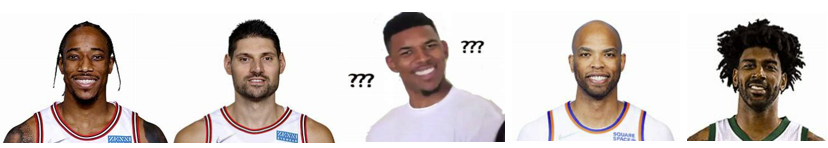

## Cincinnati (FT 68.93%)

In [29]:
#Cincinnati
df8[df8["college"]=="Cincinnati"].sort_values(by=["points"],ascending=False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
252,253,1993,37,37,LAL,Nick Van Exel,Cincinnati,13.0,880.0,28969.0,...,0.357,0.794,32.9,14.4,2.9,6.6,55.9,0.093,0.4,17.7
613,614,2000,1,1,NJN,Kenyon Martin,Cincinnati,15.0,757.0,23134.0,...,0.234,0.629,30.6,12.3,6.8,1.9,48.0,0.100,0.1,12.1
527,528,1998,31,31,LAL,Ruben Patterson,Cincinnati,10.0,649.0,15955.0,...,0.179,0.641,24.6,10.7,4.2,1.8,35.1,0.106,0.7,10.8
1241,1242,2010,40,40,IND,Lance Stephenson,Cincinnati,10.0,554.0,12680.0,...,0.314,0.694,22.9,8.6,4.1,2.9,17.5,0.066,-1.3,2.3
449,450,1997,10,10,MIL,Danny Fortson,Cincinnati,10.0,440.0,8832.0,...,0.167,0.785,20.1,8.2,7.2,0.7,22.3,0.121,-3.2,-2.6
927,928,2005,26,26,DET,Jason Maxiell,Cincinnati,10.0,618.0,11379.0,...,0.000,0.564,18.4,5.6,4.2,0.4,20.3,0.086,-2.5,-1.4
240,241,1993,25,25,CHI,Corie Blount,Cincinnati,11.0,644.0,9925.0,...,0.115,0.587,15.4,3.6,4.2,0.7,18.2,0.088,-2.5,-1.1
618,619,2000,6,6,ATL,DerMarr Johnson,Cincinnati,7.0,344.0,5930.0,...,0.336,0.789,17.2,6.2,2.2,0.9,6.4,0.052,-1.6,0.6
306,307,1994,37,37,SEA,Dontonio Wingfield,Cincinnati,4.0,114.0,1146.0,...,0.309,0.721,10.1,3.7,2.4,0.7,1.8,0.074,-2.6,-0.2


In [30]:
df8[df8["college"]=="Cincinnati"].mean()

C:\Users\paulo\AppData\Local\Temp\ipykernel_15072\3890242476.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id                             575.777778
year                          1998.888889
rank                            23.666667
overall_pick                    23.666667
years_active                    10.000000
games                          555.555556
minutes_played               13105.555556
points                        5066.777778
total_rebounds                2460.666667
assists                       1266.000000
field_goal_percentage            0.454222
3_point_percentage               0.223444
free_throw_percentage            0.689333
average_minutes_played          21.355556
points_per_game                  8.144444
average_total_rebounds           4.244444
average_assists                  1.844444
win_shares                      25.055556
win_shares_per_48_minutes        0.087333
box_plus_minus                  -1.388889
value_over_replacement           4.244444
dtype: float64

Existem 9 jogadores da NBA de Cincinnati jogando mais de 82 jogos (duração de uma temporada regular) em sua carreira na NBA com 8,14 pontos por jogo, 4,24 rebotes por jogo, 1,84 assistências por jogo

Porcentagem média de lances livres: 68,9

Os jogadores representativos são: Nick Van Exel(PG), Kenyon Martin(PF), Ruben Patterson(SF), Lance Stephenson(PF/C)

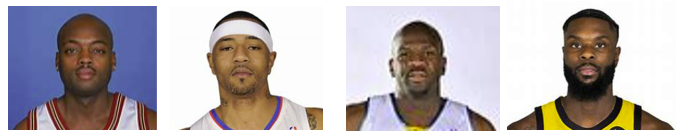
    

# NBA Survive Rate para jogadores (por faculdade)

Definição da Taxa de Sobrevivência: O jogador joga mais de 82 * 3 = 246 jogos é definido como sobreviveu

Aqui eu selecionei a faculdade que tem 5 ou mais de 5 jogadores da NBA como fonte de dados

In [31]:
df15=df13[df13["games"]<246].groupby("college").count().reset_index()
df16=df15[["college","id"]]
df16.columns=["college","d_player"]

In [32]:
df17=df13[df13["games"]>=246].groupby("college").count().reset_index()
df18=df17[["college","id"]]
df18.columns=[["college","a_player"]]

In [33]:
df19=df17.merge(df16,left_on="college",right_on="college",suffixes=('_left', '_right'))
df19["Survive_Rate"]=df19["id"]/(df19["id"]+df19["d_player"])
df20=df19[["college","Survive_Rate"]]
df21=df20.sort_values(by=["Survive_Rate"],ascending=False)
df22=df21.merge(df3,left_on="college",right_on="college",suffixes=('_left', '_right'))

In [34]:
fig = px.bar(df22, x = "college", y = "Survive_Rate", 
             title = "NBA Survive Rate by College",
             color = "college_rank", color_continuous_scale = "Blues_r",
            hover_name="college")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_xaxes(showticklabels = False) # Hide x axis ticks
fig.show()